In [1]:
path_woz = 'C:\\Users\\under\\Datasets\\Conversations\\MULTIWOZ2.1\\MULTIWOZ2.1\\data.json'
path_ms_movie = 'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\movie_all.tsv'
path_ms_restaurant = 'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\restaurant_all.tsv'
path_ms_taxi = 'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\taxi_all.tsv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from utils import data
from utils.mask import MaskCorpus
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv(path_ms_movie, sep='\t', usecols=['Message.Text'])
df_temp = pd.read_csv(path_ms_restaurant, sep='\t', usecols=['Message.Text'])
df = pd.concat([df,df_temp],axis=0)
df_temp = pd.read_csv(path_ms_taxi, sep='\t', usecols=['Message.Text'])
df = pd.concat([df,df_temp],axis=0)
df = df.dropna()
df.shape

(74685, 1)

# of sentences between 5 and 15 words in movie: 34105


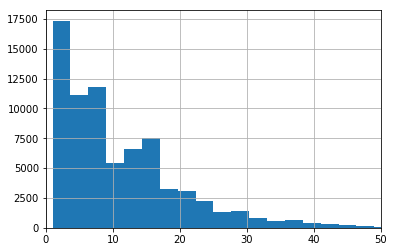

In [4]:
df['Message.Text'].str.split(' ').apply(len).hist(bins=200)
plt.xlim(0,50)
print('# of sentences between 5 and 15 words in movie:', 
      df[(df['Message.Text'].str.split(' ').apply(len)>=5) & (df['Message.Text'].str.split(' ').apply(len)<=15)].shape[0])

In [5]:
df_candidates = df[(df['Message.Text'].str.split(' ').apply(len)>=5) & (df['Message.Text'].str.split(' ').apply(len)<=15)]
df_candidates['id'] = df_candidates.reset_index().index

C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
keep_tag = ['ADJ', 'VERB', 'NOUN', 'PROPN', 'PRON', 'ADV']
keep_word = ['Why', 'What', 'Who', 'Where', 'When', 'How', '?']

In [7]:
mask_train = MaskCorpus(
                corpus=df_candidates['Message.Text'].iloc[:10000],
                idx=df_candidates['id'].iloc[:10000],
                keep_tags=keep_tag,
                keep_words=keep_word
            )

train = mask_train.generate_corpus()

Already downloaded a model for the 'en' language


In [8]:
train[10]

(10,
 '[MASK] BATMAN Night? a time range [MASK] mind ?',
 'do you have a time range in mind ?')

In [123]:
mask_val = MaskCorpus(
            corpus=df_candidates['Message.Text'].iloc[:10000],
            idx=df_candidates['id'].iloc[:10000],
            keep_tags=keep_tag,
            keep_words=keep_word
        )

val = mask_val.generate_corpus()

Already downloaded a model for the 'en' language


In [124]:
val[10]

(10,
 '[MASK] chicago have [MASK] time [MASK] [MASK] mind ?',
 'do you have a time range in mind ?')

In [125]:
mask_test = MaskCorpus(
            corpus=df_candidates['Message.Text'].iloc[:10000],
            idx=df_candidates['id'].iloc[:10000],
            keep_tags=keep_tag,
            keep_words=keep_word
        )

test = mask_test.generate_corpus()

Already downloaded a model for the 'en' language


In [126]:
test[10]

(10,
 '[MASK] you have [MASK] [MASK] range [MASK] mind ?',
 'do you have a time range in mind ?')

In [130]:
# export train set
with open(r'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\Masked Corpus\\search_space.csv', 'w', encoding="utf-8", newline='\n') as f:
    df_candidates.iloc[:,:10000].to_csv(f, index=False, header=True)

In [131]:
# export train set
df_train = pd.DataFrame(train, columns=['id', 'masked', 'original'])
with open(r'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\Masked Corpus\\train.csv', 'w', encoding="utf-8", newline='\n') as f:
    df_train.to_csv(f, index=False, header=True)

In [133]:
# export validation set
df_val = pd.DataFrame(val, columns=['id', 'masked', 'original'])
with open(r'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\Masked Corpus\\val.csv', 'w', encoding="utf-8", newline='\n') as f:
    df_val.to_csv(f, index=False, header=True)

In [134]:
# export test set
df_test = pd.DataFrame(test, columns=['id', 'masked', 'original'])
with open(r'C:\\Users\\under\\Datasets\\Conversations\\Microsoft Challenge\\Masked Corpus\\test.csv', 'w', encoding="utf-8", newline='\n') as f:
    df_test.to_csv(f, index=False, header=True)